# Lab 5

Kalyn Howes & Chloe VanCory

COSC 311

11/19/21

Implementing the k-Nearest Neighbors (kNN) classification algorithm.

(no README included - all questions are answered within this notebook - ensure cells are run sequentially)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from collections import Counter
from sklearn.metrics import confusion_matrix
import copy
import tqdm

In [2]:
iris = pd.read_csv('data/iris.data', header=None, 
                   names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Class knnalg

In [3]:
# Class with internal parameter k and methods train and predict
class knnalg:
    def __init__(self, k):
        self.k = k
        
    # i.The train method should take in an array of pre-labeled data and store them to be used in the kNN calculation later.
    # training the algorithm based on already found data
    def train(self, data, labels):
        self.data = data
        self.labels = labels
        
    # ii. The predict method should take in a single data point (of the same dimension as those used in training) 
    # and return the label of the kNN decision. Keep in mind that, in general, you may have to choose between multiple labels. 
    # In this case, ties are possible, but you can just decide to break them randomly or increase k to get more votes
    # send in a test point for it to be classified
    def predict(self, x):
        # need to find k closest neighbors to the point w the Euclidean norm
        # pair up each distance with the label of its point
        distances = [ (norm(x - self.data[i]), self.labels[i]) for i in range(len(self.data))]
        #print('Distances: ', distances)
        
        # order all the distances
        k_nearest = sorted(distances)
        #print('k_nearest: ', distances)
        
        # determine the labels of the top k points & do majority vote
        return max(Counter([p[1] for p in k_nearest[:k]]))

In [4]:
def norm(x):
    return np.sqrt(np.sum(x**2))

# 2(b) 
##### Test the algorithm (class) on some simple hand-made data that you can easily visualize or inspect to check for correct behavior

In [5]:
k = 3
knn = knnalg(k) # create class instance

# sample data for testing
data = np.array([
    [1,2],
    [1,1],
    [1,-1],
    [2,-4],
    [3,-2],
    [3,1],
    [-1,-1],
    [-1,-3]
])
labels = np.random.choice(a=['Red', 'Black'], size=len(data))
#print(data)
#print(labels)

unknown = [-.96, 1.3]

knn.train(data, labels)
knn.predict(unknown)

'Red'

# 3
##### Write a python routine to split a given data set (randomly) into testing and training subsets. It’s a good idea to parameterize this process with a percentage p so the data is split into sets of size np and n(1 − p); then you can “tune” p later for your specific training/testing procedure.

In [6]:
def divideSets(p,data):
    copydata = copy.deepcopy(data)
    # print(copydata)
    np.random.shuffle(copydata)
    list1 = copydata[:int(p*len(copydata))]
    list2 = copydata[int(p*len(copydata)):]
    #print('List 1: \n', list1)
    #print('\nList 2: \n',list2)
    
    return (list1, list2)

In [7]:
temp = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10] )
print(temp)
print(divideSets(.2, temp))

[ 1  2  3  4  5  6  7  8  9 10]
(array([2, 9]), array([ 5,  6,  1,  3,  7,  8, 10,  4]))


# 4
##### Using Python, implement the k-means algorithm and test this on the Iris dataset. Try using all of the columns versus only a subset. What works the best? How well does the algorithm do when setting k = 3, the true number of classes? Show the results visually (using only 2-d scatter plots) – be sure to indicate visually both the predicted cluster result and the true iris class.

##### All columns in Iris:

In [8]:
k = 3
knn = knnalg(k)

# need to pass an array of data points an array of labels for each of those points
# extract two columns we want to classify
x = iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']].values
labels = iris['class'].values
#print(x)
#print(labels)

# Fit/train the model/algorithm/classifier to the data and labels
knn.train(x, labels)

unclassified = [7, 2.5, 4, 8]
# It will return an array of predicted labels, one for each row
print(f'The unclassified point {unclassified} has been classified as:', knn.predict(unclassified))

The unclassified point [7, 2.5, 4, 8] has been classified as: Iris-virginica


Text(0.5, 1.0, 'Sepal Length vs Width & Petal Length vs Width')

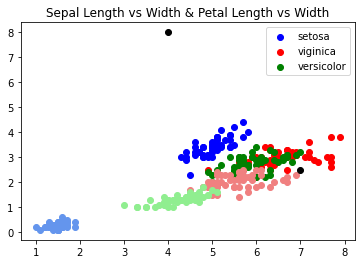

In [9]:
# plotting original data & with new point(s)
setosa = iris[iris['class'] == 'Iris-setosa']
virginica = iris[iris['class'] == 'Iris-virginica']
versicolor = iris[iris['class'] == 'Iris-versicolor']

# original data - sepal
plt.scatter(x=setosa['sepal_length'], y=setosa['sepal_width'], color='b')
plt.scatter(x=virginica['sepal_length'], y=virginica['sepal_width'], color='r')
plt.scatter(x=versicolor['sepal_length'], y=versicolor['sepal_width'], color='g')

# original data - petal
plt.scatter(x=setosa['petal_length'], y=setosa['petal_width'], color='cornflowerblue')
plt.scatter(x=virginica['petal_length'], y=virginica['petal_width'], color='lightcoral')
plt.scatter(x=versicolor['petal_length'], y=versicolor['petal_width'], color='lightgreen')

plt.scatter(x=unclassified[0], y=unclassified[1], color='black') # new point - sepal
plt.scatter(x=unclassified[2], y=unclassified[3], color='black') # new point - petal

plt.legend(['setosa', 'viginica', 'versicolor'])
plt.title("Sepal Length vs Width & Petal Length vs Width")

##### Subset of Iris: just sepal lengths & widths

In [10]:
k = 3
knn = knnalg(k)

# need to pass an array of data points an array of labels for each of those points
# extract two columns we want to classify
x = iris[['sepal_length','sepal_width']].values
labels = iris['class'].values
#print(x)
#print(labels)

# Fit/train the model/algorithm/classifier to the data and labels
knn.train(x, labels)

unclassified = [1, 4]
# It will return an array of predicted labels, one for each row
print(f'The unclassified point {unclassified} has been classified as:', knn.predict(unclassified))

The unclassified point [1, 4] has been classified as: Iris-setosa


Text(0.5, 1.0, 'Sepal Length vs Width & Petal Length vs Width')

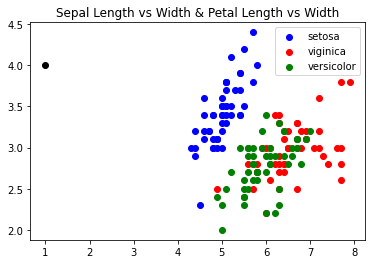

In [11]:
# plotting original data & with new point
# original data - sepal
plt.scatter(x=setosa['sepal_length'], y=setosa['sepal_width'], color='b')
plt.scatter(x=virginica['sepal_length'], y=virginica['sepal_width'], color='r')
plt.scatter(x=versicolor['sepal_length'], y=versicolor['sepal_width'], color='g')

plt.scatter(x=unclassified[0], y=unclassified[1], color='black') # new point

plt.legend(['setosa', 'viginica', 'versicolor'])
plt.title("Sepal Length vs Width & Petal Length vs Width")

# 5 
##### Using the iris dataset, test your kNN algorithm to predict which class a given iris belongs to.

In [12]:
# SET UP DATA - using sepal_lengths only for now...
# List1 - used to train
# List2 - to be predicted

# need to keep their labels!
sepal_lengths = [ (iris['sepal_length'][i], iris['class'][i]) for i in range(len(iris['sepal_length']))]
# print(sepal_lengths)

p = 0.6
n = len(iris['sepal_length'])
rets = divideSets(p, sepal_lengths)
list1 = rets[0] 
list2 = rets[1] 
# print('List 1:\n', list1)
# print('\nList 2:\n', list2)

# need to get the data in one array & the labels in another
data1 = [t[0] for t in list1]
print('\nData (List1):\n', data1)
labels1 = [t[1] for t in list1]
print('\nLabels (List1):\n', labels1)

data2 = [t[0] for t in list2]
print('\nData (List2):\n', data2)
labels2 = [t[1] for t in list2]
print('\nLabels (List2):\n', labels2)


Data (List1):
 [5.0, 5.4, 6.5, 4.4, 6.0, 5.7, 5.1, 5.1, 5.4, 7.2, 6.5, 5.3, 6.5, 6.2, 5.7, 6.5, 6.9, 4.8, 6.0, 5.7, 5.5, 4.9, 6.0, 5.8, 5.8, 6.7, 5.7, 6.7, 6.8, 5.1, 6.6, 6.4, 5.8, 5.0, 5.1, 5.7, 6.7, 5.7, 6.3, 5.9, 6.4, 5.6, 5.1, 5.9, 6.9, 6.3, 6.3, 6.7, 6.7, 4.9, 5.6, 6.4, 7.1, 7.9, 4.6, 6.4, 7.7, 5.0, 6.7, 4.8, 6.1, 5.6, 6.8, 4.7, 5.8, 5.4, 6.0, 6.7, 6.5, 5.0, 5.4, 5.2, 6.2, 6.2, 6.1, 4.8, 5.5, 5.1, 7.2, 6.4, 5.2, 5.5, 4.5, 4.6, 5.8, 4.4, 5.2, 4.9, 6.1, 7.7]

Labels (List1):
 ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',

In [13]:
k = 3
knn = knnalg(k)

knn.train(data1, labels1)

predictions_labels = []
for x in data2:
    predictions_labels.append(knn.predict(x))
    
# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
print(predictions)

[(5.0, 'Iris-setosa'), (6.9, 'Iris-virginica'), (6.4, 'Iris-virginica'), (7.3, 'Iris-virginica'), (6.4, 'Iris-virginica'), (5.0, 'Iris-setosa'), (5.1, 'Iris-setosa'), (5.5, 'Iris-versicolor'), (4.3, 'Iris-setosa'), (4.6, 'Iris-setosa'), (4.4, 'Iris-setosa'), (7.7, 'Iris-virginica'), (5.0, 'Iris-setosa'), (5.5, 'Iris-versicolor'), (5.1, 'Iris-setosa'), (6.1, 'Iris-versicolor'), (6.3, 'Iris-virginica'), (5.0, 'Iris-setosa'), (5.6, 'Iris-versicolor'), (5.7, 'Iris-versicolor'), (4.9, 'Iris-versicolor'), (6.1, 'Iris-versicolor'), (6.3, 'Iris-virginica'), (7.0, 'Iris-virginica'), (5.6, 'Iris-versicolor'), (7.2, 'Iris-virginica'), (6.3, 'Iris-virginica'), (6.0, 'Iris-virginica'), (5.7, 'Iris-versicolor'), (4.8, 'Iris-setosa'), (5.8, 'Iris-versicolor'), (7.7, 'Iris-virginica'), (6.7, 'Iris-virginica'), (5.2, 'Iris-versicolor'), (6.8, 'Iris-virginica'), (5.9, 'Iris-virginica'), (5.6, 'Iris-versicolor'), (6.6, 'Iris-virginica'), (5.8, 'Iris-versicolor'), (6.3, 'Iris-virginica'), (5.5, 'Iris-vers

##### (a) Show some confusion matrices for different size testing versus training datasets.

In [14]:
# create confusion matrix with list2 vs. predictions
# labels only: labels2 & predictions_labels
print('True Labels:\n', labels2)
print('\nPredicted Labels:\n', predictions_labels)

print('\nConfusion Matrix: \n', confusion_matrix(labels2, predictions_labels))

True Labels:
 ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',

##### (b) How does the accuracy change for different size training sets? Show how the accuracy changes within the training set and testing set separately.

Dividing the set with a p of 0.1, 0.2, 0.3 ... , 0.9.
(Earlier we used 60% as a standard)

In [15]:
sepal_lengths = [ (iris['sepal_length'][i], iris['class'][i]) for i in range(len(iris['sepal_length']))]
#print(sepal_lengths)

p = 0.1
n = len(iris['sepal_length'])
for x in range(9):
    rets = divideSets(p, sepal_lengths)
    list1 = rets[0] 
    list2 = rets[1] 

    # need to get the data in one array & the labels in another
    data1 = [t[0] for t in list1]
    labels1 = [t[1] for t in list1]
    data2 = [t[0] for t in list2]
    labels2 = [t[1] for t in list2]

    k = 3
    knn = knnalg(k)
    knn.train(data1, labels1)
    predictions_labels = []
    for x in data2:
        predictions_labels.append(knn.predict(x))

    # want predictions with their points
    predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
    #print(predictions)
    print(f'\np = {p:1.1}')
    print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))
    p += 0.1


p = 0.1
Confusion Matrix: 
 [[17 20 10]
 [ 1  5 36]
 [ 1 15 30]]

p = 0.2
Confusion Matrix: 
 [[26 13  3]
 [ 3  9 26]
 [ 0  2 38]]

p = 0.3
Confusion Matrix: 
 [[11 23  1]
 [ 0  9 31]
 [ 0  0 30]]

p = 0.4
Confusion Matrix: 
 [[22  5  2]
 [ 4 11 19]
 [ 0  6 21]]

p = 0.5
Confusion Matrix: 
 [[18  9  3]
 [ 2  6 18]
 [ 0  3 16]]

p = 0.6
Confusion Matrix: 
 [[17  3  3]
 [ 0  5 11]
 [ 0  6 15]]

p = 0.7
Confusion Matrix: 
 [[10  4  0]
 [ 1  5 14]
 [ 1  2  8]]

p = 0.8
Confusion Matrix: 
 [[ 5  1  0]
 [ 0  4  5]
 [ 0  3 13]]

p = 0.9
Confusion Matrix: 
 [[2 1 0]
 [0 0 4]
 [0 4 4]]


##### (c) What if you repeat this process, keeping the training fraction p the same? Does the accuracy change drastically based on the “quality” of the testing set? How might you quantify this behavior?

In [16]:
p = 0.6
n = len(iris['sepal_length'])
for x in range(5):
    rets = divideSets(p, sepal_lengths)
    list1 = rets[0] 
    list2 = rets[1] 

    # need to get the data in one array & the labels in another
    data1 = [t[0] for t in list1]
    labels1 = [t[1] for t in list1]
    data2 = [t[0] for t in list2]
    labels2 = [t[1] for t in list2]

    k = 3
    knn = knnalg(k)
    knn.train(data1, labels1)
    predictions_labels = []
    for x in data2:
        predictions_labels.append(knn.predict(x))

    # want predictions with their points
    predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
    #print(predictions)
    print(f'\np = {p:1.1}')
    print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))


p = 0.6
Confusion Matrix: 
 [[15  5  0]
 [ 3  6  8]
 [ 1  4 18]]

p = 0.6
Confusion Matrix: 
 [[14  3  1]
 [ 2  5 12]
 [ 1  5 17]]

p = 0.6
Confusion Matrix: 
 [[14  4  4]
 [ 1  4 11]
 [ 0  5 17]]

p = 0.6
Confusion Matrix: 
 [[14  6  0]
 [ 2 10  5]
 [ 0  8 15]]

p = 0.6
Confusion Matrix: 
 [[12  3  0]
 [ 3  7 11]
 [ 0  8 16]]


# 6
##### Try using the adult dataset to also do some prediction of income level (more or less than $50k).

In [18]:
adults = pd.read_csv('data/adult.data', header=None, skipinitialspace = True,
         names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                 'marital-status', 'occupation', 'relationship', 'race', 'sex',
                 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
)

In [19]:
len(adults['education-num'])

32561

In [20]:
# predict income based on education-num
education_income = [ (adults['education-num'][i], adults['income'][i]) for i in range(1000)]
#print(education_income)

p = 0.6
n = len(adults['education-num'])
rets = divideSets(p, education_income)
list1 = rets[0] 
list2 = rets[1] 

# need to get the data in one array & the labels in another
data1 = [t[0] for t in list1]
labels1 = [t[1] for t in list1]
#print('\nData (List1):\n', data1)
#print('\nLabels (List1):\n', labels1)

data2 = [t[0] for t in list2]
labels2 = [t[1] for t in list2]
#print('\nData (List2):\n', data2)
#print('\nLabels (List2):\n', labels2)

k = 3
knn = knnalg(k)
knn.train(data1, labels1)
predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(knn.predict(data2[i]))

# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
#print(predictions)
print(f'\np = {p:1.1}')
print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))

100%|██████████| 400/400 [00:02<00:00, 164.71it/s]


p = 0.6
Confusion Matrix: 
 [[297   2]
 [ 91  10]]


When we ran on the entire adults data set, len(adults['education-num'])

p = 0.6

Confusion Matrix: 
 [[9900    0]
 [3125    0]]

##### (a) How can you try to quantify the “distance” between two adults? Write some small python functions to try and transform this data into something that can be used by the kNN classifier. Try a couple different approaches, report their different behaviors and illustrate using learning curves, confusion matrices, and possibly some statistical measurements.

In [21]:
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
# using our probability from lab 4, quantify each occupation
# probability gives each occupation a weight
# scale the occupations based one which are more likely to earn >50k

num_occupations = len(adults['occupation'].unique())

# loop through all occupations
probabilities = [] # holds occupations & their probabilities
for i in adults['occupation'].unique():
    current = adults[ (adults['occupation'] == i) & (adults['income'] == '>50K') ]
    #probability person works in occupation ___ & has income >50k
    pAnB = len(current) / len(adults)
    B = adults[ (adults['occupation'] == i) ]
    pB = len(B) / len(adults)
    pAgivenB = pAnB / pB
    probabilities.append((pAgivenB, i))
    
probabilities_sorted = sorted(probabilities)
#print(probabilities_sorted)

ranks = []
count = 0
for p in probabilities_sorted:
    ranks.append((p[1], count))
    count += 1

print('Occupations and their ranks based on their probability to have an income >50k:\n')
print(ranks)

Occupations and their ranks based on their probability to have an income >50k:

[('Priv-house-serv', 0), ('Other-service', 1), ('Handlers-cleaners', 2), ('?', 3), ('Armed-Forces', 4), ('Farming-fishing', 5), ('Machine-op-inspct', 6), ('Adm-clerical', 7), ('Transport-moving', 8), ('Craft-repair', 9), ('Sales', 10), ('Tech-support', 11), ('Protective-serv', 12), ('Prof-specialty', 13), ('Exec-managerial', 14)]


In [23]:
# replace occupations with their ranks in that adult subset
occupations = adults['occupation']
#print(occupations)

# go through each rank tuple
for job in ranks:
    # replace occupation string with its rank
    occupations = occupations.replace(job[0], job[1])
    
#print(occupations)

In [24]:
# add occupation-num column
adults = adults.assign(occupation_num = occupations)
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,occupation_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,7
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,14
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,13


In [28]:
occupation_income = [ (adults['occupation_num'][i], adults['income'][i]) for i in range(10000)]
#print(occupation_income)

p = 0.6
n = len(occupation_income)
rets = divideSets(p, occupation_income)
list1 = rets[0] 
list2 = rets[1] 

# need to get the data in one array & the labels in another
data1 = [t[0] for t in list1]
labels1 = [t[1] for t in list1]
#print('\nData (List1):\n', data1)
#print('\nLabels (List1):\n', labels1)

data2 = [t[0] for t in list2]
labels2 = [t[1] for t in list2]
#print('\nData (List2):\n', data2)
#print('\nLabels (List2):\n', labels2)

k = 3
knn = knnalg(k)
knn.train(data1, labels1)
predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(knn.predict(data2[i]))

# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
#print(predictions)
print(f'\np = {p:1.1}')
print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))

100%|██████████| 4000/4000 [03:47<00:00, 17.55it/s]


p = 0.6
Confusion Matrix: 
 [[3007    0]
 [ 993    0]]


##### (b) Are there other “labels” within the dataset that can be effectively learned by the kNN classifier?

In [26]:
# hours-per-week to predict income
hours = [(adults['hours-per-week'][i], adults['income'][i]) for i in range(1000)]
#print(hours)

p = 0.6
n = len(adults['hours-per-week'])
rets = divideSets(p, hours)
list1 = rets[0] 
list2 = rets[1] 

# need to get the data in one array & the labels in another
data1 = [t[0] for t in list1]
labels1 = [t[1] for t in list1]
#print('\nData (List1):\n', data1)
#print('\nLabels (List1):\n', labels1)

data2 = [t[0] for t in list2]
labels2 = [t[1] for t in list2]
#print('\nData (List2):\n', data2)
#print('\nLabels (List2):\n', labels2)

k = 3
knn = knnalg(k)
knn.train(data1, labels1)
predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(knn.predict(data2[i]))

# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
#print(predictions)
print(f'\np = {p:1.1}')
print('Confusion Matrix: \n', confusion_matrix(labels2, predictions_labels))

100%|██████████| 400/400 [00:02<00:00, 168.74it/s]


p = 0.6
Confusion Matrix: 
 [[288  18]
 [ 87   7]]


In the above confusion matrices for the adults set, we need to keep in mind why little to no points are being predicted to be >50k. 

Look at the instances of <=50k vs. >50k below, there are many more instances of <=50K in general so the above results are not necessarily suprising. Especially since the above are only being trained and predicted on 1000 data points instead of all 32000+.

In [27]:
adults['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64